In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
data = pd.read_csv("D:\\historical_prices_.csv")

# Data Preprocessing
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])
# Sort data by date
data.sort_values('Date', inplace=True)
# Set 'Date' as index
data.set_index('Date', inplace=True)

# Handle missing values
# Assuming 'Close' is the main column of interest, fill missing values with the previous value
data['Close'].fillna(method='ffill', inplace=True)

# Calculate daily percentage change
data['Daily Change %'] = data['Close'].pct_change() * 100

data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Change %
Date,,,,,,,
2023-11-06,1.2372,1.2429,1.2367,1.2374,1.2374,NaN,NaN
2023-11-07,1.2344,1.2348,1.2277,1.2346,1.2346,NaN,-0.226281
2023-11-08,1.2290,1.2301,1.2243,1.2292,1.2292,NaN,-0.437389
2023-11-09,1.2286,1.2309,1.2254,1.2285,1.2285,NaN,-0.056948
2023-11-10,1.2216,1.2238,1.2189,1.2217,1.2217,NaN,-0.553521


In [10]:
### Step 2: Analytical Techniques
#Now that the data is preprocessed, I will proceed with the analytical techniques:

#1. **Trend Analysis**: Calculate moving averages (20-day and 50-day) to identify trends.
#2. **Volatility Analysis**: Calculate Bollinger Bands and the Relative Strength Index (RSI) to assess volatility.

#Let's calculate the moving averages first.

# Calculate moving averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

data[['Close', 'MA20', 'MA50']].head(25)


,Close,MA20,MA50
Date,,,
2023-11-06,1.2374,NaN,NaN
2023-11-07,1.2346,NaN,NaN
2023-11-08,1.2292,NaN,NaN
2023-11-09,1.2285,NaN,NaN
2023-11-10,1.2217,NaN,NaN
2023-11-13,1.2228,NaN,NaN
2023-11-14,1.2281,NaN,NaN
2023-11-15,1.2495,NaN,NaN
2023-11-16,1.2422,NaN,NaN


In [11]:
### Step 3: Volatility Analysis

#Next, I will calculate the Bollinger Bands and the Relative Strength Index (RSI) to assess volatility.

#Let's start with calculating the Bollinger Bands.

# Calculate Bollinger Bands
window = 20
std_dev = 2
data['BB_upper'] = data['MA20'] + (data['Close'].rolling(window=window).std() * std_dev)
data['BB_lower'] = data['MA20'] - (data['Close'].rolling(window=window).std() * std_dev)

data[['Close', 'BB_upper', 'BB_lower']].head(25)

,Close,BB_upper,BB_lower
Date,,,
2023-11-06,1.2374,NaN,NaN
2023-11-07,1.2346,NaN,NaN
2023-11-08,1.2292,NaN,NaN
2023-11-09,1.2285,NaN,NaN
2023-11-10,1.2217,NaN,NaN
2023-11-13,1.2228,NaN,NaN
2023-11-14,1.2281,NaN,NaN
2023-11-15,1.2495,NaN,NaN
2023-11-16,1.2422,NaN,NaN


In [13]:
#Now, let's calculate the Relative Strength Index (RSI) to further assess volatility.

def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI
data['RSI'] = calculate_rsi(data)

data[['Close', 'RSI']].head(25)

,Close,RSI
Date,,
2023-11-06,1.2374,NaN
2023-11-07,1.2346,NaN
2023-11-08,1.2292,NaN
2023-11-09,1.2285,NaN
2023-11-10,1.2217,NaN
2023-11-13,1.2228,NaN
2023-11-14,1.2281,NaN
2023-11-15,1.2495,NaN
2023-11-16,1.2422,NaN


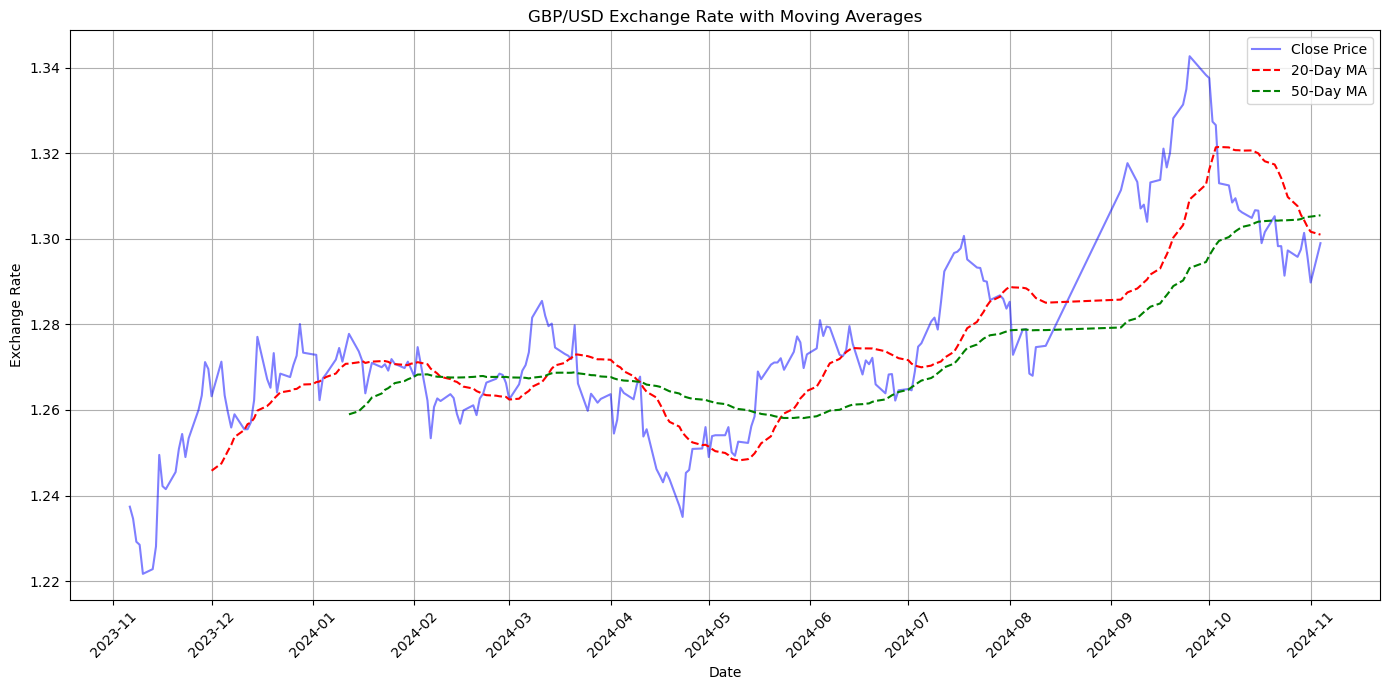

In [16]:
import matplotlib.dates as mdates

# Line Chart with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(data.index, data['MA20'], label='20-Day MA', color='red', linestyle='--')
plt.plot(data.index, data['MA50'], label='50-Day MA', color='green', linestyle='--')

plt.title('GBP/USD Exchange Rate with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

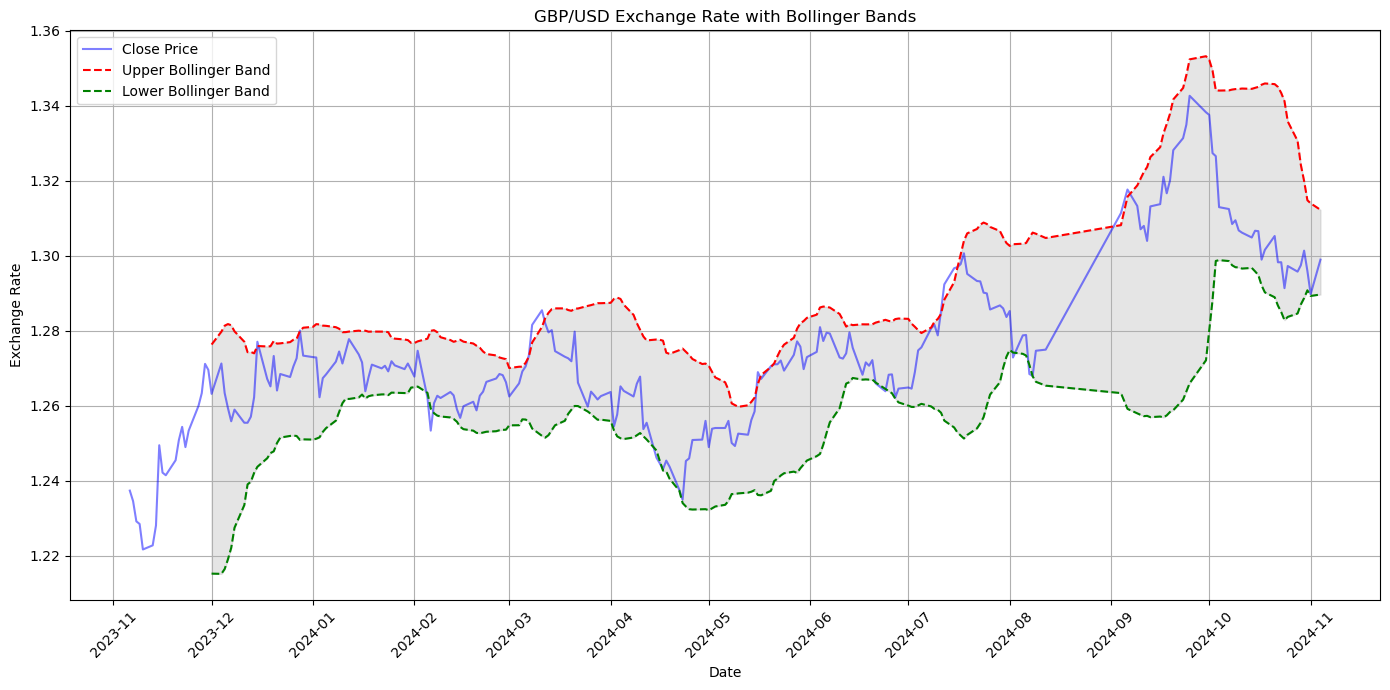

In [17]:
# Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(data.index, data['BB_upper'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(data.index, data['BB_lower'], label='Lower Bollinger Band', color='green', linestyle='--')

plt.fill_between(data.index, data['BB_upper'], data['BB_lower'], color='gray', alpha=0.2)

plt.title('GBP/USD Exchange Rate with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

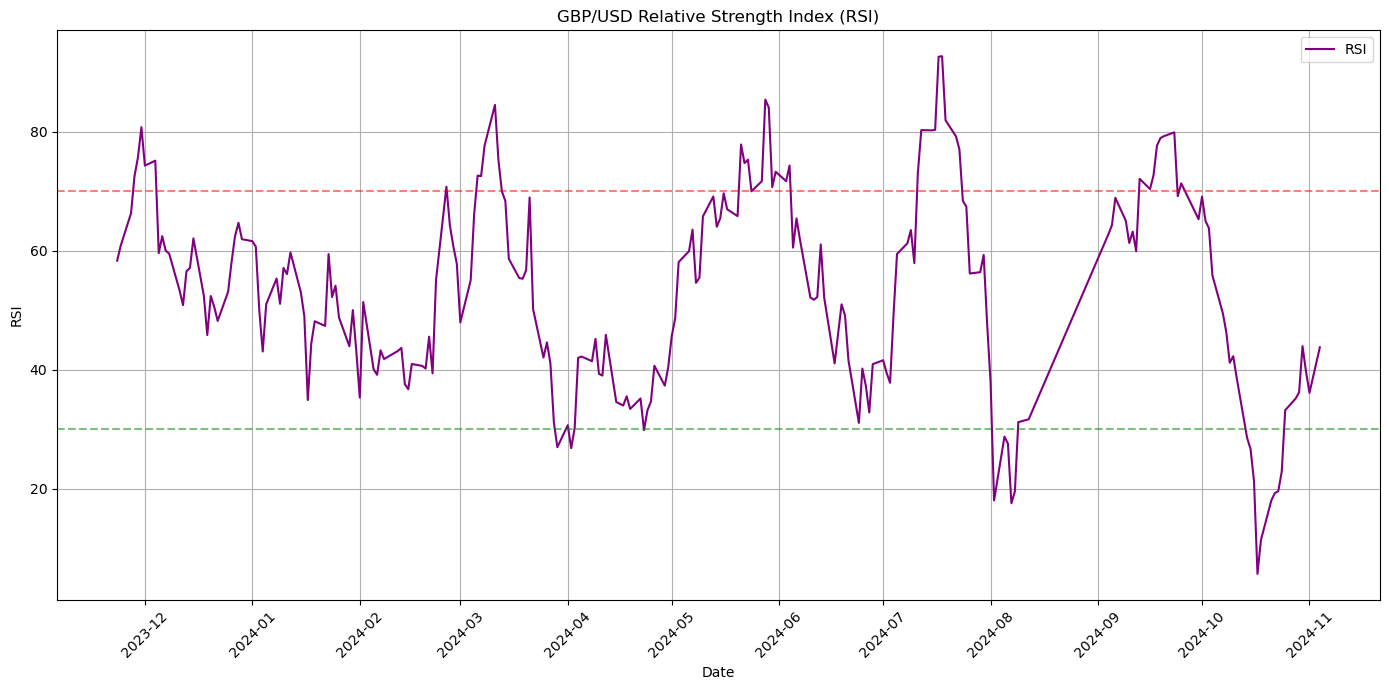

In [18]:
# Relative Strength Index (RSI)
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')

plt.title('GBP/USD Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

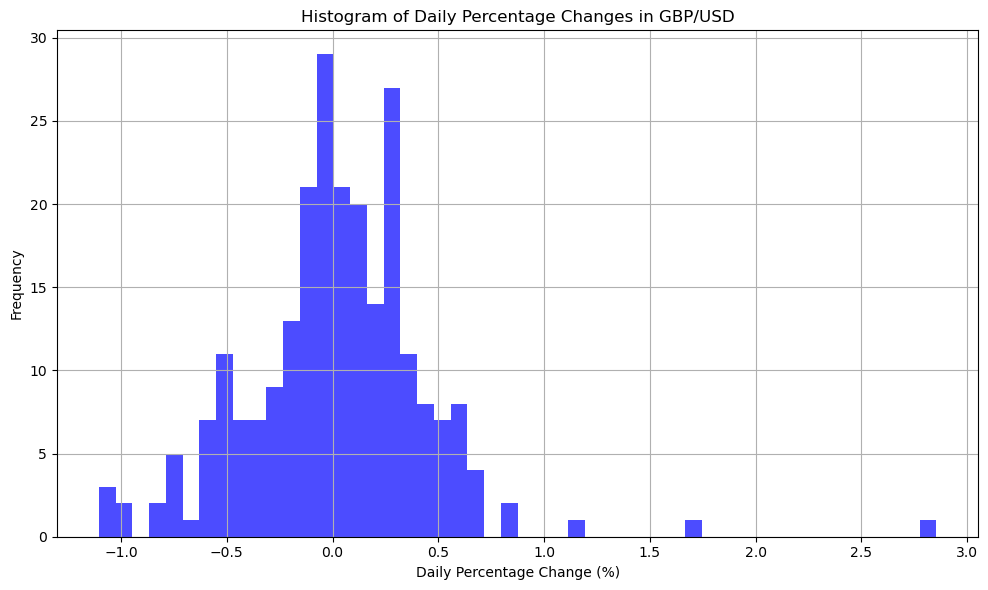

In [19]:
# Histogram of Daily Percentage Changes
plt.figure(figsize=(10, 6))
plt.hist(data['Daily Change %'].dropna(), bins=50, color='blue', alpha=0.7)

plt.title('Histogram of Daily Percentage Changes in GBP/USD')
plt.xlabel('Daily Percentage Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()